# 0. Set up

In [1]:
## Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
## Set paths
user = os.getenv('USERNAME')
shared_workspace = '/home/mdawkins/modelling_club'
user_dir = os.path.join(shared_workspace, user)
data_dir = os.path.join(shared_workspace, 'raw_data')
data_output_dir = os.path.join(shared_workspace, 'raw_data_lfs/engineered/credit_card_balance/')

# 1. Import data

In [3]:
home_loan_train = pd.read_csv(data_dir + '/raw/application_train.csv',index_col='SK_ID_CURR')
train_response = home_loan_train['TARGET']

home_loan_test = pd.read_csv(data_dir + '/raw/application_test_noTarget.csv',index_col='SK_ID_CURR')
home_loan_test.loc[:, 'TARGET'] = None

credit_card_balance = pd.read_csv(data_dir + '/raw/credit_card_balance.csv')
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.00,2250.000,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
1,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.76,11925.000,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
2,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.89,27000.000,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
3,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.50,4093.515,4093.515,285376.410,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
4,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.34,45000.000,45000.000,192793.275,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,1036507,328243,-9,0.000,45000,NaN,0.000,NaN,NaN,0.00,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3227961,1714892,347207,-9,0.000,45000,0.0,0.000,0.0,0.000,0.00,1879.110,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3227962,1302323,215757,-9,275784.975,585000,270000.0,270000.000,0.0,0.000,2250.00,375750.000,356994.675,269356.140,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3227963,1624872,430337,-10,0.000,450000,NaN,0.000,NaN,NaN,0.00,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [4]:
CC_features = credit_card_balance

# CC_IS_ACTIVE_FLAG - flag for if they have any active credit
CC_features.loc[:, 'CC_IS_ACTIVE_FLAG'] = '0'
CC_features.loc[CC_features['NAME_CONTRACT_STATUS'] == 'Active', 'CC_IS_ACTIVE_FLAG'] = '1'

# CC_DPD_MAX - maximum days overdue
CC_features['CC_DPD_MAX'] = CC_features.groupby("SK_ID_CURR")['SK_DPD'].transform('max')

# average withdrawal size
CC_features.loc[:, 'CC_ALL_WD_SIZE_AVG'] = CC_features['AMT_DRAWINGS_CURRENT'] / CC_features['CNT_DRAWINGS_CURRENT']
CC_features.loc[:, 'CC_ATM_WD_SIZE_AVG'] = CC_features['AMT_DRAWINGS_ATM_CURRENT'] / CC_features['CNT_DRAWINGS_ATM_CURRENT']
CC_features.loc[:, 'CC_OTHER_WD_SIZE_AVG'] = CC_features['AMT_DRAWINGS_OTHER_CURRENT'] / CC_features['CNT_DRAWINGS_OTHER_CURRENT']
CC_features.loc[:, 'CC_POS_WD_SIZE_AVG'] = CC_features['AMT_DRAWINGS_POS_CURRENT'] / CC_features['CNT_DRAWINGS_POS_CURRENT']

# Proportion of limit used
CC_features.loc[:, 'CC_USAGE_PERC'] = CC_features['AMT_DRAWINGS_CURRENT'] / CC_features['AMT_CREDIT_LIMIT_ACTUAL']

# CC_features = CC_features[['SK_ID_CURR', 'CC_DPD_MAX', 'CC_IS_ACTIVE_FLAG']]
# CC_features = CC_features.groupby('SK_ID_CURR').max()

CC_features
# pos_features[pos_features['SK_ID_CURR'] == 100201].drop_duplicates()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CC_IS_ACTIVE_FLAG,CC_DPD_MAX,CC_ALL_WD_SIZE_AVG,CC_ATM_WD_SIZE_AVG,CC_OTHER_WD_SIZE_AVG,CC_POS_WD_SIZE_AVG,CC_USAGE_PERC
0,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.00,2250.000,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,1,1,2250.000000,2250.0,NaN,NaN,0.050000
1,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.76,11925.000,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0,1,0,2250.000000,2250.0,NaN,NaN,0.010000
2,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.89,27000.000,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0,1,1,11547.000000,NaN,NaN,11547.000,0.025660
3,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.50,4093.515,4093.515,285376.410,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0,1,0,36167.428125,30000.0,NaN,39867.885,0.989195
4,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.34,45000.000,45000.000,192793.275,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0,1,8,12336.300000,25500.0,NaN,5754.450,0.493452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,1036507,328243,-9,0.000,45000,NaN,0.000,NaN,NaN,0.00,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,1,0,NaN,NaN,NaN,NaN,0.000000
3227961,1714892,347207,-9,0.000,45000,0.0,0.000,0.0,0.000,0.00,1879.110,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0,1,0,NaN,NaN,NaN,NaN,0.000000
3227962,1302323,215757,-9,275784.975,585000,270000.0,270000.000,0.0,0.000,2250.00,375750.000,356994.675,269356.140,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0,1,0,135000.000000,135000.0,NaN,NaN,0.461538
3227963,1624872,430337,-10,0.000,450000,NaN,0.000,NaN,NaN,0.00,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,1,0,NaN,NaN,NaN,NaN,0.000000


In [ ]:
CC_features.to_pickle(data_output_dir + "credit_card_features.pkl")

In [7]:
# check the proportion defaults for loans with DPD>0
test = CC_features.merge(home_loan_train[['TARGET']], on='SK_ID_CURR')
test.loc[:, 'CC_DPD_FLAG'] = '0'
test.loc[test['CC_DPD_MAX'] > 0, 'CC_DPD_FLAG'] = '1'
test[['TARGET', 'CC_DPD_FLAG']].groupby('CC_DPD_FLAG').mean()

,TARGET
CC_DPD_FLAG,
0,0.087482
1,0.081715


(array([2.157762e+06, 7.758300e+04, 4.980100e+04, 3.531900e+04,
        2.122100e+04, 2.632500e+04, 2.017000e+04, 1.511000e+04,
        1.487200e+04, 8.275000e+03, 1.490600e+04, 8.433000e+03,
        1.140900e+04, 7.223000e+03, 5.487000e+03, 8.440000e+03,
        8.587000e+03, 4.904000e+03, 5.600000e+03, 3.206000e+03,
        6.349000e+03, 3.516000e+03, 3.419000e+03, 3.274000e+03,
        2.515000e+03, 7.463000e+03, 2.918000e+03, 2.316000e+03,
        2.325000e+03, 1.647000e+03, 3.636000e+03, 2.218000e+03,
        1.713000e+03, 3.407000e+03, 2.091000e+03, 1.240000e+03,
        1.477000e+03, 2.649000e+03, 1.170000e+03, 9.180000e+02,
        2.091000e+03, 1.398000e+03, 1.228000e+03, 1.370000e+03,
        9.520000e+02, 1.836000e+03, 1.631000e+03, 1.502000e+03,
        1.999000e+03, 1.907400e+04]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.

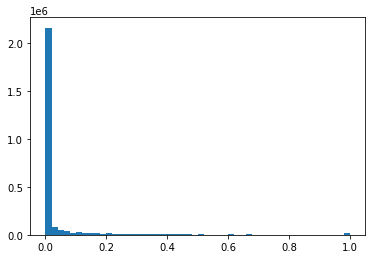

In [5]:
plt.hist(CC_features[(CC_features["CC_USAGE_PERC"]<=1) & (CC_features["CC_USAGE_PERC"]>=0)]["CC_USAGE_PERC"],bins=50)

(array([3.173225e+06, 0.000000e+00, 4.600000e+02, 1.635000e+03,
        2.456000e+03, 1.460000e+02, 1.950000e+02, 0.000000e+00,
        2.080000e+02, 9.100000e+02, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 8.500000e+01, 7.790000e+02, 1.220000e+03,
        2.125000e+03, 0.000000e+00, 2.500000e+01, 1.380000e+02,
        4.000000e+00, 1.300000e+01, 0.000000e+00, 1.300000e+01,
        7.800000e+01, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        2.300000e+01, 8.500000e+01, 4.100000e+02, 1.505000e+03,
        0.000000e+00, 1.900000e+01, 8.600000e+01, 2.000000e+00,
        1.000000e+01, 0.000000e+00, 8.000000e+00, 4.000000e+01,
        9.000000e+00, 0.000000e+00, 0.000000e+00, 1.500000e+01,
        4.900000e+01, 4.260000e+02, 1.044000e+03, 0.000000e+00,
        1.000000e+01, 5.900000e+01]),
 array([ 0.  ,  1.98,  3.96,  5.94,  7.92,  9.9 , 11.88, 13.86, 15.84,
        17.82, 19.8 , 21.78, 23.76, 25.74, 27.72, 29.7 , 31.68, 33.66,
        35.64, 37.62, 39.6 , 41.58, 43.56, 45.54, 47

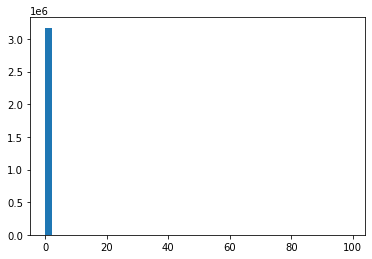

In [6]:
plt.hist(credit_card_balance[(credit_card_balance["SK_DPD"]<100)]["SK_DPD"],bins=50)